In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import time

In [2]:
model = YOLO('models/bestv8x.pt', task='detect')
image = 'test/test_enemy.jpg'

In [3]:
#Resize the image for best results
def resize_image(image_path, target_size=(640, 640)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    return resized_image

resized_img = resize_image(image)


0: 640x640 1 enemy, 42.0ms
Speed: 4.0ms preprocess, 42.0ms inference, 54.5ms postprocess per image at shape (1, 3, 640, 640)


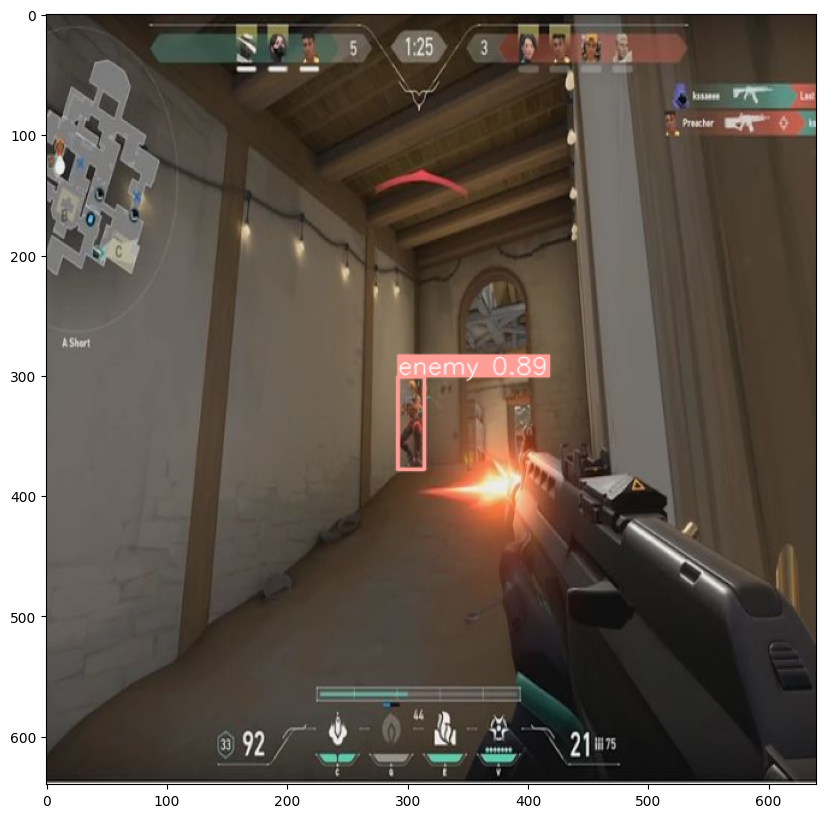

In [4]:
results = model(resized_img)

#Test directly from yolov8 docs
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    plt.figure(figsize=(10,10))
    plt.imshow(im)

In [7]:
#Video Inference Test
vid = 'test/short-gameplay.mp4'
output_path = 'test/output_video.mp4'

In [8]:
cap = cv2.VideoCapture(vid) #OpenCV Video capture

frame_rate = int(cap.get(5)) #Frame rate of the video
width, height = 640, 640 #Resize

In [9]:
#Video Writer to concat each frame back into a video
video_writer = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 
                               frame_rate, (width, height))

In [10]:
#Keep Track of how many frames its processed
start_time = time.time()
frame_count = 0

#While theres still frames it will continue
while cap.isOpened():
    success, frame = cap.read()
    frame_count += 1
    
    #Each frame is extracted and predicted on
    if success:
        results = model.track(frame, 
                              persist=True, 
                              conf=0.5, 
                              verbose=False,
                              tracker='models/bytetrack.yaml')
        
        annotated_frame = results[0].plot() #Draw bbox
        video_writer.write(annotated_frame) #Add to .mp4
        
        #Prints the progress of the prediction
        if time.time() - start_time > 5:
            print(f'Proccessed {frame_count} frames.')
            start_time = time.time()
    else:
        break
    
video_writer.release()
cap.release()

Proccessed 123 frames.
Proccessed 262 frames.
Proccessed 402 frames.
Proccessed 542 frames.
Proccessed 683 frames.
Proccessed 816 frames.
Proccessed 940 frames.
Proccessed 1062 frames.
